### RFMulitpole vs standard CC.

The induced closed orbit from an RFMultipole used as CC and the standard CC is comapred.

To represent the CC with the RFMultipole we implement it as as skew dipole (skew for a vertical CC).

Code of the RFMultipole in Pysixtrack : https://github.com/SixTrack/pysixtrack/blob/master/pysixtrack/elements.py 

Therefore the vertical kick on the transverse plane from a skew dipole is :

\begin{equation}
\Delta p_y = cs \cdot ksl,
\end{equation}
where

- $cs = \cos(ps*\pi/180 - k \cdot \tau )$ with ps the phase of the cavity.
- $k = 2 \pi f_{CC}/c$ , the cavity wavenumber. $f_{CC}$ the frequency of the cavity in Hz
- $\tau$ = zeta/ rvv / $\beta_0$
- rvv = $\beta / \beta_0$ , where $\beta$ the relativistic beta of the particle and $\beta_0$ the relativistic beta of the reference particle
- zeta = simga/rvv in [m]

and $ksl = V_{CC}/PC_0$, where $V_{CC}$ the voltage of the CC in [V] and $PC_0$ the reference momentum in [eV]

The vertical kick from the standard Crab Cavity 

\begin{equation}
\Delta p_y = \frac{V_{CC}}{Ε_0} \sin(\phi_s + k z), 
\end{equation}
where $V_{CC}$ the CC voltage in [V], E_0 the beam energy in [eV], $\phi_s$ the phase of the CC, k the wavenumber and z the longitudinal coordinate.


In [10]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [11]:
# Plotting parameters
params = {'legend.fontsize': 25,
          'figure.figsize': (12.5, 10.5),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 8,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### Constants

In [12]:
m0 = 0.9382720813e9 # proton rest mass, [eV/c^2] 
clight = 299792458 # speed of light [m/s]

#### Parameters of the reference particle

In [13]:
E_rest = m0 # eV
E_0 = 26e9 # total energy of the reference particle [eV]
PC_0 = np.sqrt(E_0**2-E_rest**2)  # reference momentum times the speed of ligth --> [eV]
gamma_0 =  E_0/E_rest # gamma realtivistic of the reference particle  # crosscheckd with mad
beta_0 = np.sqrt(1-1/gamma_0**2) # beta realtivistic of the reference particle

#### Crab cavity parameters

In [14]:
V_CC = 3e6 # V
f_CC = 400e6 # Hz
ps = 90. # phase of the cavity

#### Create a longitudinal distribution
- Just evenly spaced values within a given integral
- The limits are choosen similar to the gaussian initial distributions from /afs/cern.ch/work/n/natriant/private/pysixtrack_example_crabcavity/input/initial_distribution_wrt_CO.pkl. The choice can be arbtitrary. 

In [15]:
n_particles = 1000.
start, stop = -0.6, 0.6
step = (stop-start)/n_particles
initial_sigmas = np.arange(start, stop, step)

In [16]:
start, stop = -1e4, 1e4
step = (stop-start)/n_particles
initial_deltas = np.arange(start, stop, step)

#### 1) Calculate $\tau$ for the RFMultipole kick

In [17]:
tau_list = []  # [m] for the RFMulitpole
z_list = [] # [m] for the CC
for particle in range(0, len(initial_sigmas)):
    PC = (1 + initial_deltas[particle]) * PC_0 # momentum times the speed of light --> [eV]
    gamma = np.sqrt(1+(PC/m0)**2)
    beta = np.sqrt(1-1/gamma**2)    
    rvv = beta/beta_0
    
    # RF energy kick 
    z = initial_sigmas[particle]/ rvv
    z_list.append(z)
    tau = z / rvv / beta_0
    tau_list.append(tau)

#### Estimate the transverse kick from the RFMultiple (skew dipole)

In [18]:
k = 2 * np.pi * f_CC / clight # wavenumber of the cavity
cs = np.cos(ps*np.pi/180 - k* np.array(tau_list))
ksl = V_CC/PC_0 
Delta_py = cs * ksl 

#### Estimate the induced closed orbit

In [19]:
beta_y = 27.46384921 # start of the lattice
beta_y_CC1 =  76.07315729 # CC1
Qy = 26.18
muy = + 4.05373914#3.134818627 # maybe 20.25- 3..

In [20]:
y_co_RF = (np.sqrt(beta_y*beta_y_CC1)) * np.array(Delta_py)*np.cos(muy*2*np.pi - np.pi*Qy) / (2*np.sin(np.pi*Qy)) 

#### 2) Standard CC

In [21]:
delta_py_CC = V_CC * np.sin(ps + k * np.array(z_list))/E_0

In [22]:
y_co_CC = (np.sqrt(beta_y*beta_y_CC1)) * np.array(delta_py_CC)*np.cos(2*np.pi*muy - np.pi*Qy)/ (2*np.sin(np.pi*Qy)) 

### Compare the induced closed orbit from the standard CC vs RF Multipole

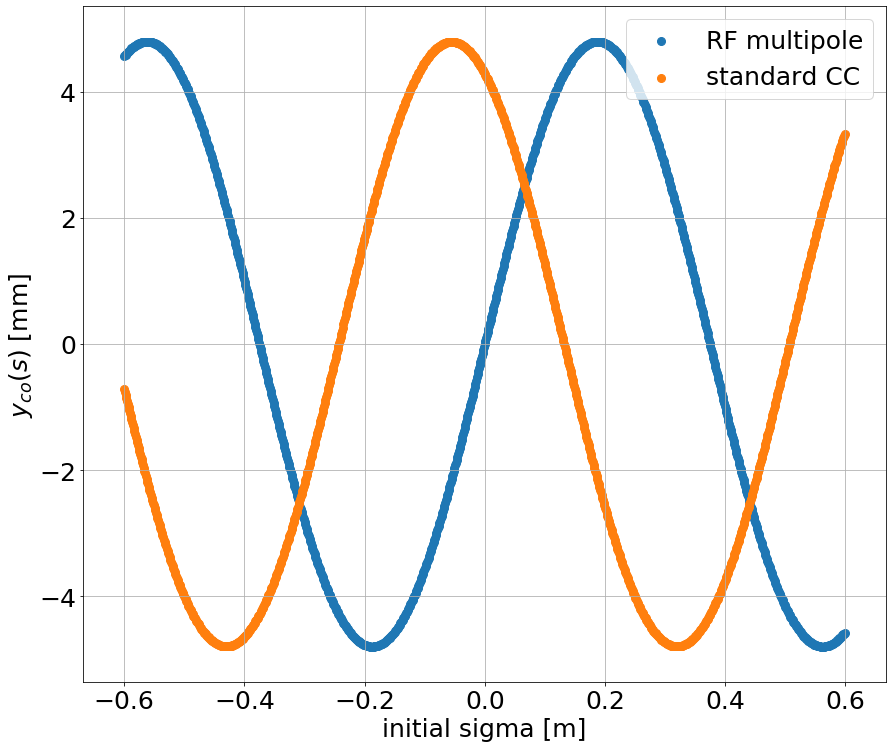

In [26]:
plt.scatter(initial_sigmas, y_co_RF*1e3, label = 'RF multipole')
plt.scatter(initial_sigmas, y_co_CC*1e3, label = 'standard CC')
plt.xlabel('initial sigma [m]')
plt.ylabel(r'$y_{co}(s)$ [mm] ')
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('RFmultipole_vs_CC_Vcc{:.2f}MV_fcc{:.2f}MHz_ps{:.2f}_E{:.2f}GeV_100particles.png'.format(V_CC/1e6, f_CC/1e6, ps, E_0/1e9))

### Conclusion 1 : In the definition of the RF Multipole the phase of the cavity is shifted by 90 degrees compared to the standard crab cavity.

### Conclusion 2 : For the comparison with the simulation data we can use either of the kicks. Standard CC is more simple.